# Auswertung der fav Dateien
Erstellung der Graphen: 
- Prob density Ergebnislänge in Abh. des Fliptyps für einen cooling parameter
- Prob density Ergebnislänge in Abh. des cooling parameters je fliptype
- Prob density der Zeit des Erreichens der optimalen Länge in Abh. zum cooling parameter je fliptype

In [30]:
##### Ließt Dateien
import json

filename = "fav_revert_part_c0.85_breakp_0.01_starting_temp_70.json"

fav_data = []

for line in open(filename,"r"):
    fav_data.append(json.loads(line))
    
read.close()

# Auswertung der history Dateien
Erstellung der Graphen:
- Weglänge in Abhängigkeit der Zeit

In [57]:
######Ließt dateien
import json

fileprefix_start = 0 #Um mehrere Dateien einzulesen -> Im Dateinamen ändert sich nur die erste Zahl -> diese ist der prefix
fileprefix_end = 3
filesufix = ["_history_revert_part_c0.85_breakp_0.01_starting_temp_70.json","_history_swap_random_c0.85_breakp_0.01_starting_temp_70.json"]
fliptypes = ["revert_part","swap_random"]

data = [] #hier werden alle Daten aller history dateien gespeichert
filename_array = []

for i in range(fileprefix_start,fileprefix_end):
    for j in range(0,len(filesufix)):
        filename = str(i) + filesufix[j]
        read = open(filename,"r")
        data.append(json.load(read))
        filename_array.append(str(i)+";"+ fliptypes[j])

read.close()  

In [58]:
######speichert unterschiedliche Datenarten in untersch. Listen

##Datenstruktur bisher:
#Datenstruktur eines Eintrages: Länge, Temperatur, runtime, steps, path
#Datenstruktur data: data[Nummer Durchlauf][Nummer des Eintrages des Durchlaufes für einen Zeitpunkt][Datenart im Eintrag]

##Datenstruktur danach:
#laenge[im Durchlauf][zum Zeitpunkt]

laenge = []
temperature = []
runtime = []
steps = []
path = []

for i in range(0,len(data)): #über Nummer des Durchlaufes
    laenge_zeile = []
    temperature_zeile = []
    runtime_zeile = []
    steps_zeile = []
    path_zeile = []
    for j in range(0,len(data[i])): #über versch. Zeitpunkte
        laenge_zeile.append(data[i][j][0])
        temperature_zeile.append(data[i][j][1])
        runtime_zeile.append(data[i][j][2])
        steps_zeile.append(data[i][j][3])
        path_zeile.append(data[i][j][4])
    laenge.append(laenge_zeile)
    temperature.append(temperature_zeile)
    runtime.append(runtime_zeile)
    steps.append(steps_zeile)
    path.append(path_zeile)

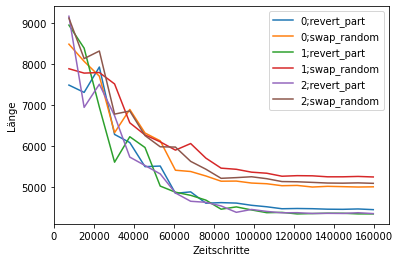

In [59]:
import matplotlib.pyplot as plt

for i in range(0,len(data)):
    plt.plot(steps[i],laenge[i],label=filename_array[i])

plt.xlabel("Zeitschritte")
plt.ylabel("Länge")
plt.legend()

plt.show
plt.savefig("Laufzeit-Laenge",dpi = 1000)